In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text

df = pd.read_csv('youtube.csv')

def clean_unit(s):
   if 'K' in s:
      return float(s.replace('K', ''))*1_000
   elif 'M' in s:
      return float(s.replace('M', ''))*1_000_000
   elif 'B' in s:
      return float(s.replace('B', ''))*1_000_000_000
   return float(s)

df['SUBSCRIBERS'] = df['SUBSCRIBERS'].apply(clean_unit)
df['VIEWS'] = df['VIEWS'].apply(clean_unit)
df['TOTAL_NUMBER_OF_VIDEOS'] = df['TOTAL_NUMBER_OF_VIDEOS'].apply(clean_unit)

def merge_categories(s):
   if s is None:
      return s
   
   try:
      s = s.lower()
   except:
      return None
   if 'kids' in s:
      return 'kids'
   if 'sport' in s or 'fit' in s:
      return 'sport'
   if 'music' in s:
      return 'music'
   if 'entertainment' in s:
      return 'entertainment'
   if 'educat' in s:
      return 'education'
   return s

df['CATEGORY'] = df['CATEGORY'].apply(merge_categories)
categories_to_keep = ['entertainment', 'music', 'kids', 'education', 'news', 'sport']
df = df[df['CATEGORY'].isin(categories_to_keep)]

print(f'shape: {df.shape}')
df = df.head(100)
df.head()

shape: (442, 6)


,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799.0,274000000.0,5.098000e+10,entertainment
1,#2,T-Series,21120.0,267000000.0,2.571600e+11,music
2,#3,Cocomelon - Nursery Rhymes,1180.0,176000000.0,1.828800e+11,kids
3,#4,SET India,138970.0,173000000.0,1.647100e+11,entertainment
4,#5,✿ Kids Diana Show,1220.0,123000000.0,1.035000e+11,kids


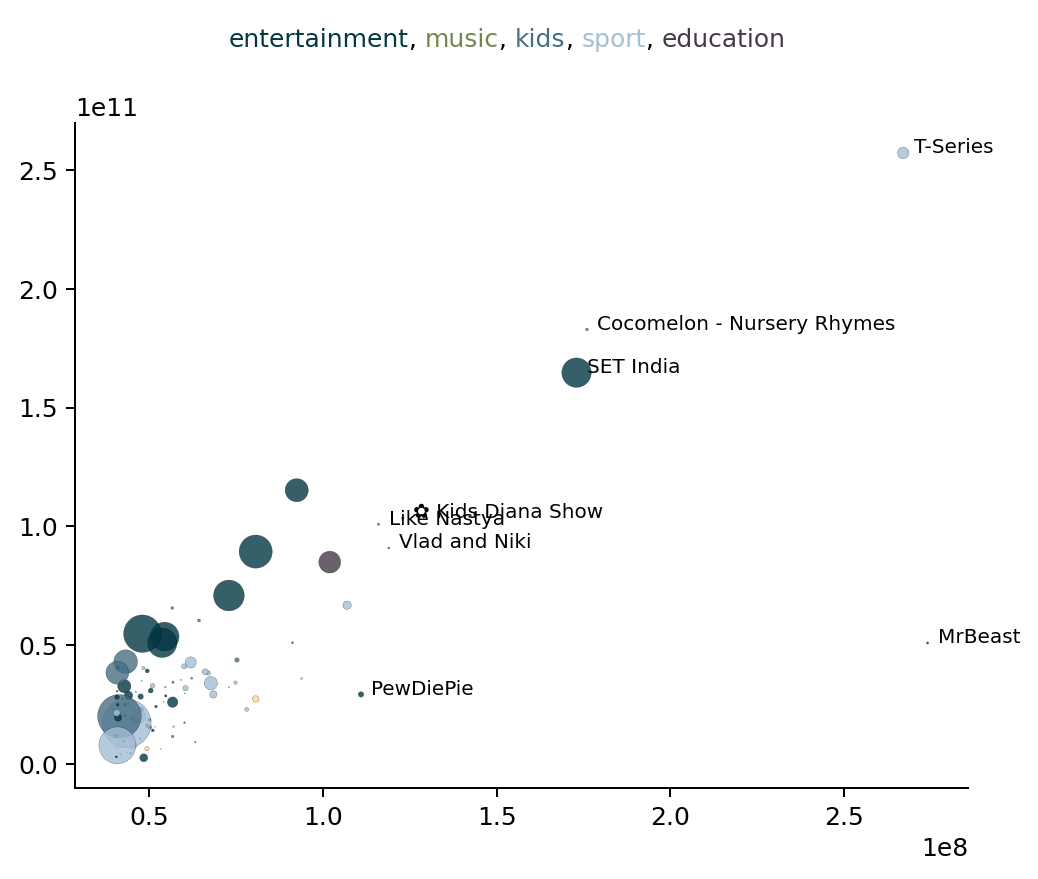

In [128]:
fig, ax = plt.subplots(dpi=180)
ax.spines[['top', 'right']].set_visible(False)

name_to_display = df.sort_values(by='SUBSCRIBERS', ascending=False).head(8)['NAME_OF_CHANNEL'].values

for name in name_to_display:
   row = df[df['NAME_OF_CHANNEL']==name]
   ax.text(
      x = row['SUBSCRIBERS'].values[0]+3000000,
      y = row['VIEWS'].values[0],
      s = f"{row['NAME_OF_CHANNEL'].values[0]}",
      fontsize=8
   )

cmap = load_cmap('Acadia')

ax.scatter(
   df['SUBSCRIBERS'],
   df['VIEWS'],
   c=df['CATEGORY'].astype("category").cat.codes,
   s=df['TOTAL_NUMBER_OF_VIDEOS']/1000,
   cmap=cmap,
   edgecolor='black',
   linewidth=0.1,
   alpha=0.8
)

fig_text(
   x=0.5, y=0.99,
   s=f"<{'>, <'.join(list(df['CATEGORY'].unique()))}>",
   va='top', ha='center', highlight_textprops=[{'color':cmap(i+1)} for i in range(5)],
)

plt.show()